In [1]:
import pandas as pd

In [2]:
propeller_curve = pd.read_excel('./T200-Public-Performance-Data.xlsx', sheet_name='16 V')

In [3]:
propeller_curve.columns = (['PWM', 'RPM', 'Current', 'Voltage', 'Power', 'Force kgf','Efficiency'])

In [4]:
propeller_curve['Normal Command'] = (propeller_curve['PWM'] - 1500)/400

In [5]:
propeller_curve['Force'] = propeller_curve['Force kgf'] * 9.81

In [6]:
propeller_curve.tail()

,PWM,RPM,Current,Voltage,Power,Force kgf,Efficiency,Normal Command,Force
196,1884,3454.990,22.38,16,358.08,5.075694,14.174750,0.96,49.792563
197,1888,3493.840,22.81,16,364.96,5.143733,14.093964,0.97,50.460023
198,1892,3515.950,23.28,16,372.48,5.175485,13.894665,0.98,50.771505
199,1896,3527.230,23.90,16,382.40,5.220844,13.652835,0.99,51.216479
200,1900,3533.445,23.83,16,381.28,5.245035,13.756324,1.00,51.453798


In [7]:
force = propeller_curve['Force'].tolist()

In [8]:
command = propeller_curve['Normal Command'].tolist()

In [9]:
import numpy as np

In [58]:
param = np.polyfit(command, force, 17)

In [59]:
import matplotlib.pyplot as plt

In [60]:
y = []
for x in np.arange(-1, 1, 0.01):
    y.append(np.polyval(param, x))

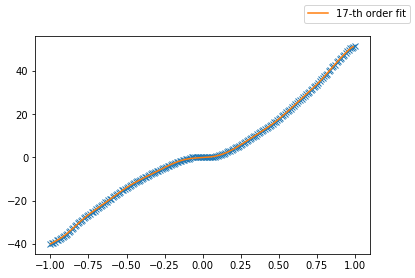

In [65]:
fig, ax = plt.subplots()
ax.plot(command, force, 'x')
ax.plot(np.arange(-1, 1, 0.01), y, label='17-th order fit')
fig.legend()

In [71]:
param_over_zero = param.copy()

In [72]:
param_over_zero[-1] = 0

In [75]:
y = []
for x in np.arange(-1, 1, 0.01):
    y.append(np.polyval(param_over_zero, x))

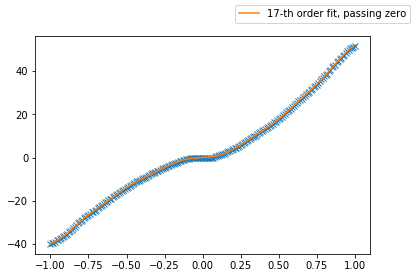

In [77]:
fig, ax = plt.subplots()
ax.plot(command, force, 'x')
ax.plot(np.arange(-1, 1, 0.01), y, label='17-th order fit, passing zero')
fig.legend()

In [78]:
np.polyval(param_over_zero, 0)

0.0

In [80]:
param_over_zero

array([-9.61680578e+03, -6.99048595e+02,  4.43322720e+04,  2.47918407e+03,
       -8.51058600e+04, -3.54208066e+03,  8.80005365e+04,  2.63030018e+03,
       -5.30120789e+04, -1.10323287e+03,  1.88403735e+04,  2.74935028e+02,
       -3.85071008e+03, -4.63403410e+01,  4.54202447e+02,  1.20375096e+01,
        3.77929694e+00,  0.00000000e+00])

In [15]:
import numpy as np

In [16]:
def force_and_moment_h(rotation_angle, tilt_angle, x, y, z):
    fx = np.cos(rotation_angle)
    fy = -np.sin(rotation_angle)
    fz = 0
    mx = fz * y - fy * z
    my = fx * z - fz * x
    mz = fy * x - fx * y
    return np.array([fx, fy, fz, mx, my, mz])

def force_and_moment_v(rotation_angle, tilt_angle, x, y, z):
    fx = 0
    fy = 0
    fz = np.sin(tilt_angle)
    mx = fz * y - fy * z
    my = fx * z - fz * x
    mz = fy * x - fx * y
    return np.array([fx, fy, fz, mx, my, mz])

In [17]:
np.array([force_and_moment_h(np.pi/4, 0, 0.156, 0.111, 0.085),
         force_and_moment_h(-np.pi/4, 0, 0.156, -0.111, 0.085),
         force_and_moment_h(np.pi *3/4, 0, -0.156, 0.111, 0.085),
         force_and_moment_h(-np.pi *3/4, 0, -0.156, -0.111, 0.085),
         force_and_moment_v(0, -np.pi/2, 0, 0.111, 0),
         force_and_moment_v(0, np.pi/2, 0, -0.111, 0)]).T

array([[ 0.70710678,  0.70710678, -0.70710678, -0.70710678,  0.        ,
         0.        ],
       [-0.70710678,  0.70710678, -0.70710678,  0.70710678,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.        ,
         1.        ],
       [ 0.06010408, -0.06010408,  0.06010408, -0.06010408, -0.111     ,
        -0.111     ],
       [ 0.06010408,  0.06010408, -0.06010408, -0.06010408,  0.        ,
         0.        ],
       [-0.18879751,  0.18879751,  0.18879751, -0.18879751,  0.        ,
         0.        ]])

In [81]:
allocation_matrix = np.array([[-1,  1,  1,  0],
                              [-1, -1, -1,  0],
                              [ 1,  1, -1,  0],
                              [ 1, -1,  1,  0],
                              [ 0,  0,  0, -1],
                              [ 0,  0,  0, -1]])  

In [85]:
np.dot(allocation_matrix, np.array([1,0,0,0]).T)

array([-1, -1,  1,  1,  0,  0])

In [87]:
np.dot(allocation_matrix, np.array([1,0,1,0]).T)

array([ 0, -2,  0,  2,  0,  0])